In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df1=pd.read_csv("/content/sample_data/admission.csv")
df1.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,IIT Bombay
1,2015,95,92,2,100,IIT delhi
2,2018,91,80,6,260,IIT kanpur
3,2017,88,85,2,222,IIT kharagpur
4,2016,89,84,1,600,IIT guwahati


In [ ]:
df=df1.copy()
len(df) #number of rows-> entries

1004

In [ ]:
colg=np.unique(df['College'])
print(colg)
#ab aage entries check krni h
print(len(df))
print(len(colg))

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']
1004
38


In [ ]:
code=[]
for i in range(len(colg)):
    code.append(i+1)

In [ ]:
print(code)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [ ]:
df['College']=df['College'].replace(colg,code)
bak_college=np.array(df['College'])
df.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11
2,2018,91,80,6,260,18
3,2017,88,85,2,222,19
4,2016,89,84,1,600,13


In [ ]:
X = df.drop(columns=["Year","College"])
Y = df['College']
print(Y)

0        9
1       11
2       18
3       19
4       13
        ..
999     15
1000    33
1001    30
1002    15
1003     3
Name: College, Length: 1004, dtype: int64


<ipython-input-24-08d485612fba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AIEEE Rank'])


<Axes: xlabel='AIEEE Rank', ylabel='Density'>

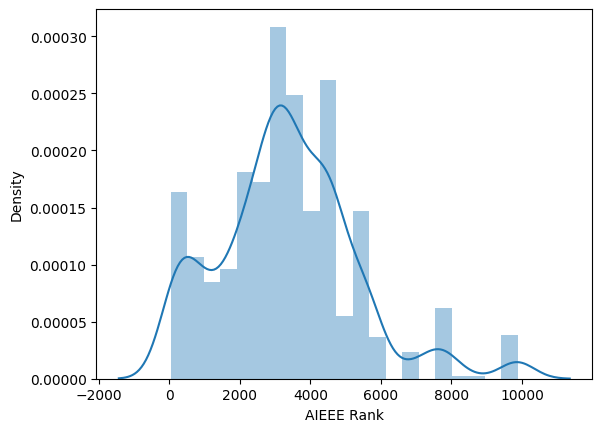

In [ ]:
import seaborn as sns
sns.distplot(df['AIEEE Rank'])

<ipython-input-23-3746151c55ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['12th Marks'])


<Axes: xlabel='12th Marks', ylabel='Density'>

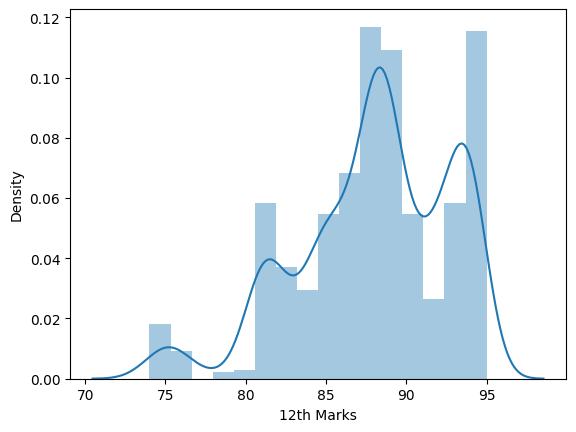

In [ ]:
sns.distplot(df['12th Marks'])

<ipython-input-22-1b5b0e2825da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['10th Marks'])


<Axes: xlabel='10th Marks', ylabel='Density'>

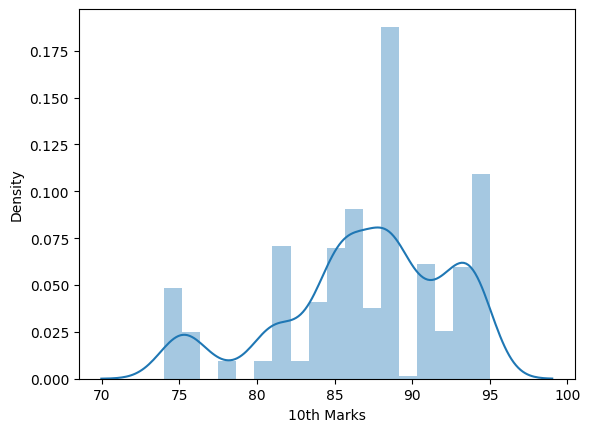

In [ ]:
sns.distplot(df['10th Marks'])

In [ ]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

classifier = XGBClassifier(objective="multi:softmax",n_estimators=50,learning_rate=0.0001)
classifier.fit(X_train,y_train)
print(X_train)
print(y_train)
predxg=classifier.predict(X_test)
scrxg=classifier.score(X_test,y_test)
print(scrxg)
scrxg=eval("%0.2f"%scrxg)*100
print("Algorithm Score: ",scrxg,"%")

     10th Marks  12th Marks  12th Division  AIEEE Rank
552          81          89              4        4512
311          89          94              5        3215
997          95          86              9         985
567          94          94              2        5826
0            90          89              3          98
..          ...         ...            ...         ...
106          88          80              1        4120
270          89          94              5        3215
860          94          89              4        5529
435          76          81              5        3562
102          88          88              4         956

[672 rows x 4 columns]
[16 33 12 25  8 16 32  9 15 37 11 28 33 20 22  7  6 31 26 37  9 31  0  3
 14 31 11 33 20  0  5 34 24 14 30 31 20  8  8  3 28 20 27  5 32 10 20 13
 20 14 25 33  6  6  9  5 30 14 10 28 35 18 17 31 17  0 15 18 33 25 33 27
 24 35 28 10 15 20 16  2 33 32  0  5 30 23 35  5 35 36  5 26  9  8 14 20
  4 31 24  9 18 26  8 25

In [ ]:
pd.crosstab(y_test, predxg, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,8,9,11,...,29,30,31,32,33,34,35,36,37,All
True,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10
2,0,8,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
4,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,10
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,4
6,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,5
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,6
9,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=36)
clfdt = DecisionTreeClassifier()
clfdt.fit(X_train,y_train)
preddt=clfdt.predict(X_test)
scrdt=clfdt.score(X_test,y_test)
scrdt=eval("%0.2f"%scrdt)*100
print("Algorithm Score: ",scrdt,"%")

Algorithm Score:  98.0 %


# **USER INPUTS**

In [ ]:
df.head(4)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11
2,2018,91,80,6,260,18
3,2017,88,85,2,222,19


In [ ]:
col=df.columns.tolist()[1:-1]
print(col)

['10th Marks', '12th Marks', '12th Division', 'AIEEE Rank']


## Input Your Marks as Asked:

In [ ]:
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))

10th Marks: 95
12th Marks: 93
12th Division: 1
AIEEE Rank: 2103


In [ ]:
userpreddt=clfdt.predict([usrip])
print("You may have change to get entrance in: ",colg[code.index(userpreddt[0])])

You may have change to get entrance in:  IIT mandi


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dct={col[i]:usrip[i]
    for i in range(len(col))}
print(dct)

{'10th Marks': 95, '12th Marks': 93, '12th Division': 1, 'AIEEE Rank': 2103}


In [ ]:
uip=pd.DataFrame(dct,index=[len(X_test)])
uip.head()

,10th Marks,12th Marks,12th Division,AIEEE Rank
51,95,93,1,2103
